<a href="https://colab.research.google.com/github/NirmalVignu/ML-Project1/blob/master/Boston_House__price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error,r2_score

In [8]:
boston=load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [11]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [12]:
boston.data.shape

(506, 13)

In [15]:
bos=pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
bos.columns=boston.feature_names
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [20]:
bos['price']=boston.target
print(bos.shape)

(506, 14)


In [23]:
Y=bos['price']
X=bos.drop('price',axis=1)
print(X.head())
print(Y.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=5)

In [33]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_test_predict=lr.predict(X_test)
y_train_predict=lr.predict(X_train)

In [36]:
df=pd.DataFrame(y_predict,y_test)
df.head()

,0
price,
37.6,37.389977
27.9,31.567942
22.6,27.133739
13.8,6.551176
35.2,33.693108


In [42]:
mse=mean_squared_error(y_test,y_predict)
mse

30.697037704088636

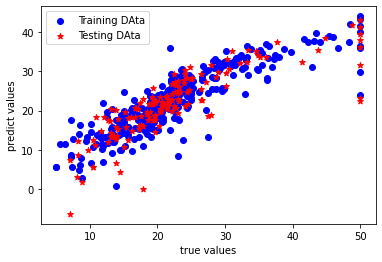

In [46]:
plt.scatter(y_train,y_train_predict,color="blue",marker="o",label="Training DAta")
plt.scatter(y_test,y_test_predict,color="red",marker="*",label="Testing DAta")
plt.xlabel('true values')
plt.ylabel('predict values')
plt.legend(loc='upper left')
plt.plot()
plt.show()

In [48]:
import pickle

In [59]:
with open('model_pickel','wb')as f:
  pickle.dump(lr,f)

In [60]:
with open('model_pickel','rb')as f:
  m=pickle.load(f)

In [61]:
m.coef_

array([-1.54486040e-01,  4.13948217e-02, -2.53765225e-02,  7.86055259e-01,
       -1.29365836e+01,  4.03952301e+00, -1.05354914e-02, -1.33498644e+00,
        3.18272501e-01, -1.26427463e-02, -9.77287564e-01,  1.26714702e-02,
       -4.62052176e-01])

In [62]:
m.intercept_

31.73035129649766

In [63]:
from sklearn.externals import joblib


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [64]:
joblib.dump(lr,'model_joblib')

['model_joblib']

In [65]:
mj=joblib.load('model_joblib')

In [66]:
mj.coef_

array([-1.54486040e-01,  4.13948217e-02, -2.53765225e-02,  7.86055259e-01,
       -1.29365836e+01,  4.03952301e+00, -1.05354914e-02, -1.33498644e+00,
        3.18272501e-01, -1.26427463e-02, -9.77287564e-01,  1.26714702e-02,
       -4.62052176e-01])

In [67]:
mj.intercept_

31.73035129649766